In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data into a dataframe
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [4]:
# get unique company names
df['Company Name'].nunique()

439

In [5]:
# total number of jobs created in Queens
sum(df[df['Borough']=='Queens']['Job created'].dropna())

102.0

In [8]:
# make a column for email domain names
df['domain'] = df['company email'].str.split('@').str[1]
# get the number of unique domain names
df['domain'].nunique()

356

In [10]:
# group by NTA and get count, mean of the total savings and the sum of jobs created
nta_df = df.groupby(by='NTA').agg({'Company Name':'count','Total Savings':np.mean,'Job created':sum})
# display each NTA with greater than 5 companies
nta_df[nta_df['Company Name']>5]

,Company Name,Total Savings,Job created
NTA,,,
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bushwick South,10,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
College Point,7,17159.372857,2.0
Crown Heights North,9,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
East New York,9,48433.093333,15.0
East Williamsburg,11,13990.626364,0.0
Greenpoint,14,9753.649286,0.0


In [48]:
# write the results to a csv
nta_df[nta_df['Company Name']>5].to_csv('nta_groupby.csv')

Text(0, 0.5, 'Total Jobs Created')

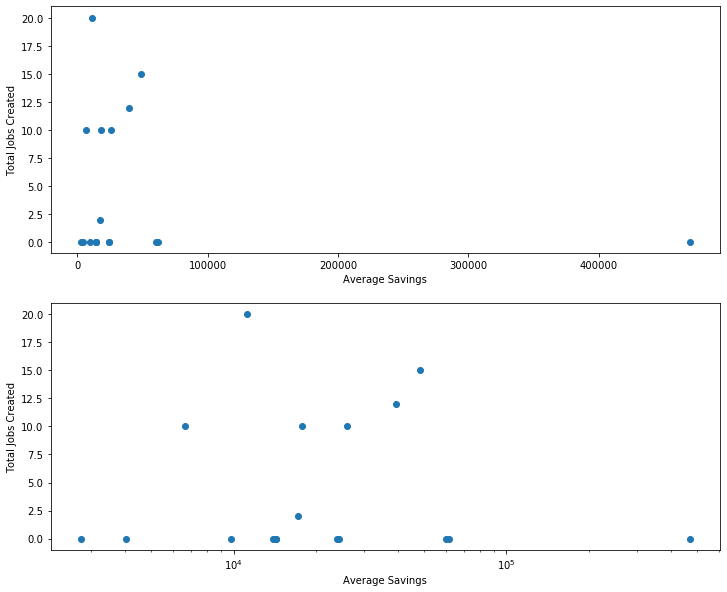

In [18]:
# read in the previous data
newdf = pd.read_csv('nta_groupby.csv')
# scatter plots of jobs created vs average savings
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,10))
# first figure is plotted on a linear scale
ax1.scatter(newdf['Total Savings'],newdf['Job created'])
ax1.set_xlabel('Average Savings')
ax1.set_ylabel('Total Jobs Created')
# second figure is plotted on a log scale
ax2.scatter(newdf['Total Savings'],newdf['Job created'])
ax2.set_xscale('log')
ax2.set_xlabel('Average Savings')
ax2.set_ylabel('Total Jobs Created')


(array([ 0.,  0.,  4., 13.,  1.,  0.,  0.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 7 Patch objects>)

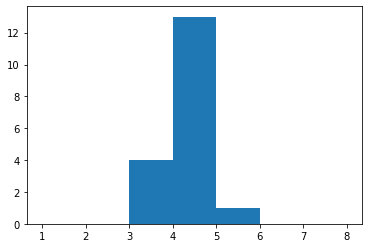

In [27]:
# histogram the average savings
bins = np.linspace(1,8,8)
plt.hist(np.log10(newdf['Total Savings']),bins=bins)
plt.xlabel('log of average savings')

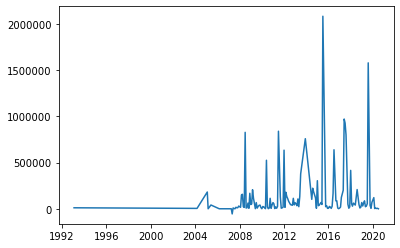

In [56]:
# create a column for month
df['Month']=pd.to_datetime(df['Effective Date']).dt.to_period('M')
# sum total savings by month
gdf = df.groupby(by='Month').sum('Total Savings')
# plot total savings vs month
plt.plot(gdf.index.to_timestamp(),gdf['Total Savings'].values)
